# Project Milestone 2: Multi-Object Detection with Multiple Models
## Complete Training Pipeline & Performance Comparison

### 📋 Project Requirements:
1. ✅ Generate 100+ multi-object images
2. ✅ Train multiple deep learning models
3. ✅ Document all models and their performance
4. ✅ Identify the best model for the dataset

### 🎯 Models to Test:
1. **YOLOv8n** (Nano) - Fastest, smallest
2. **YOLOv8s** (Small) - Balanced speed/accuracy
3. **YOLOv8m** (Medium) - Higher accuracy
4. **YOLOv8 with different hyperparameters** - Optimization

This notebook will:
- Train all models
- Compare performance metrics
- Generate visualizations
- Create data for your report

---
## Step 1: Setup & Install Dependencies

In [ ]:
# Install required packages
!pip install -q ultralytics opencv-python-headless matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
import json
from datetime import datetime

print("✅ All imports successful!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ All imports successful!


---
## Step 2: Configuration

In [ ]:
# CONFIGURE YOUR PATHS
DATASET_PATH = '/content/drive/MyDrive/Output_Folder_YoLo'  # Path to your generated dataset
DATA_YAML = f"{DATASET_PATH}/data.yaml"

# Training configuration
EPOCHS = 50  # Number of training epochs
BATCH_SIZE = 16  # Adjust based on GPU memory
IMAGE_SIZE = 640  # Standard YOLO size

# Results directory
RESULTS_DIR = "/content/model_results"
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"📁 Dataset: {DATASET_PATH}")
print(f"📁 Results: {RESULTS_DIR}")
print(f"⚙️  Training config: {EPOCHS} epochs, batch size {BATCH_SIZE}")

📁 Dataset: /content/drive/MyDrive/Output_Folder_YoLo
📁 Results: /content/model_results
⚙️  Training config: 50 epochs, batch size 16


---
## Step 3: Verify Dataset

In [ ]:
# Check dataset structure
print("📊 Dataset Structure:")
!ls -lh {DATASET_PATH}

print("\n📄 Data YAML:")
!cat {DATA_YAML}

# Count images
train_images = len(list(Path(f"{DATASET_PATH}/visualizations/Training").glob("*.jpg")))
val_images = len(list(Path(f"{DATASET_PATH}/visualizations/Validation").glob("*.jpg")))

print(f"\n✅ Training images: {train_images}")
print(f"✅ Validation images: {val_images}")
print(f"✅ Total: {train_images + val_images}")

📊 Dataset Structure:
total 13K
-rw------- 1 root root  650 Feb  8 00:48 data.yaml
drwx------ 2 root root 4.0K Feb  7 23:48 images
drwx------ 2 root root 4.0K Feb  7 23:48 labels
drwx------ 4 root root 4.0K Feb  8 00:05 visualizations

📄 Data YAML:
# YOLOv8 Dataset Configuration
# Auto-generated grid-based multi-object dataset

path: /content/drive/MyDrive/Output Folder YoLo
train: images/train
val: images/val

# Number of classes
nc: 39

# Class names (OBJ IDs like OBJ021, OBJ022, etc.)
names: ['OBJ786', 'OBJ788', 'OBJ789', 'OBJ069', 'OBJ007', 'OBJ027', 'OBJ090', 'OBJ787', 'OBJ001', 'OBJ002', 'OBJ003', 'OBJ004', 'OBJ005', 'OBJ006', 'OBJ008', 'OBJ009', 'OBJ010', 'OBJ012', 'OBJ016', 'OBJ018', 'OBJ019', 'OBJ021', 'OBJ022', 'OBJ028', 'OBJ029', 'OBJ031', 'OBJ061', 'OBJ095', 'OBJ107', 'OBJ108', 'OBJ111', 'OBJ159', 'OBJ208', 'OBJ222', 'OBJ229', 'OBJ230', 'OBJ311', 'OBJ405', 'images_OBJ_300']

✅ Training images: 100
✅ Validation images: 20
✅ Total: 120


---
## Step 4: Train Multiple Models

### 🎯 Interview Key Point:
**Why test multiple models?**
- Different model sizes offer speed/accuracy trade-offs
- Nano (n): Fastest, suitable for edge devices
- Small (s): Balanced, good for most applications
- Medium (m): Highest accuracy, requires more compute

In [ ]:
# Dictionary to store results
model_results = {}

def train_and_evaluate(model_name, model_path, project_name):
    """
    Train a YOLO model and return its performance metrics.
    """
    print(f"\n{'='*60}")
    print(f"🚀 Training {model_name}")
    print(f"{'='*60}")

    # Load model
    model = YOLO(model_path)

    # Train
    results = model.train(
        data=DATA_YAML,
        epochs=EPOCHS,
        imgsz=IMAGE_SIZE,
        batch=BATCH_SIZE,
        name=project_name,
        patience=10,
        save=True,
        plots=True,
        verbose=True
    )

    # Validate
    metrics = model.val()

    # Extract key metrics
    result_data = {
        'model_name': model_name,
        'mAP50': float(metrics.box.map50),
        'mAP50-95': float(metrics.box.map),
        'precision': float(metrics.box.mp),
        'recall': float(metrics.box.mr),
        'model_path': f"runs/detect/{project_name}/weights/best.pt",
        'parameters': model.model.model[-1].np  # Number of parameters
    }

    print(f"\n✅ {model_name} Training Complete!")
    print(f"   mAP@0.5: {result_data['mAP50']:.3f}")
    print(f"   mAP@0.5:0.95: {result_data['mAP50-95']:.3f}")
    print(f"   Precision: {result_data['precision']:.3f}")
    print(f"   Recall: {result_data['recall']:.3f}")

    return result_data

print("✅ Training function ready!")

✅ Training function ready!


### Model 1: YOLOv8 Nano (Fastest)

In [ ]:
model_results['yolov8n'] = train_and_evaluate(
    model_name='YOLOv8 Nano',
    model_path='yolov8n.pt',
    project_name='yolov8n_detection'
)


🚀 Training YOLOv8 Nano
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8n_detection2, nbs=64, nms=False, opset=None, optim

### Model 2: YOLOv8 Small (Balanced)

In [ ]:
model_results['yolov8s'] = train_and_evaluate(
    model_name='YOLOv8 Small',
    model_path='yolov8s.pt',
    project_name='yolov8s_detection'
)


🚀 Training YOLOv8 Small
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8s_detection, nbs=64, nms=False, opset=None, optim

### Model 3: YOLOv8 Medium (Most Accurate)

In [ ]:
model_results['yolov8m'] = train_and_evaluate(
    model_name='YOLOv8 Medium',
    model_path='yolov8m.pt',
    project_name='yolov8m_detection'
)


🚀 Training YOLOv8 Medium
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8m_detection, nbs=64, nms=False, opset=None, opti

### Model 4: YOLOv8 Nano with Optimized Hyperparameters

In [ ]:
# Train with data augmentation and optimized parameters
print(f"\n{'='*60}")
print(f"🚀 Training YOLOv8 Nano (Optimized)")
print(f"{'='*60}")

model = YOLO('yolov8n.pt')

results = model.train(
    data=DATA_YAML,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    name='yolov8n_optimized',
    patience=15,  # More patience
    save=True,
    plots=True,
    # Augmentation parameters
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation
    hsv_v=0.4,    # HSV-Value
    degrees=10.0,  # Rotation
    translate=0.1, # Translation
    scale=0.5,     # Scaling
    fliplr=0.5,    # Horizontal flip
    mosaic=1.0,    # Mosaic augmentation
    # Optimization
    optimizer='AdamW',
    lr0=0.001,     # Initial learning rate
    verbose=True
)

metrics = model.val()

model_results['yolov8n_optimized'] = {
    'model_name': 'YOLOv8 Nano (Optimized)',
    'mAP50': float(metrics.box.map50),
    'mAP50-95': float(metrics.box.map),
    'precision': float(metrics.box.mp),
    'recall': float(metrics.box.mr),
    'model_path': 'runs/detect/yolov8n_optimized/weights/best.pt',
    'parameters': model.model.model[-1].np
}

print(f"\n✅ Optimized Model Training Complete!")
print(f"   mAP@0.5: {model_results['yolov8n_optimized']['mAP50']:.3f}")
print(f"   mAP@0.5:0.95: {model_results['yolov8n_optimized']['mAP50-95']:.3f}")


🚀 Training YOLOv8 Nano (Optimized)
Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Output_Folder_YoLo/data.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8n_optimized, nbs=64, nms=False, opse

---
## Step 5: Compare All Models

In [ ]:
# Create comparison DataFrame
df_results = pd.DataFrame(model_results).T

print("\n" + "="*80)
print("📊 MODEL PERFORMANCE COMPARISON")
print("="*80)
print(df_results.to_string())
print("="*80)

# Save to CSV for report
df_results.to_csv(f"{RESULTS_DIR}/model_comparison.csv")
print(f"\n✅ Results saved to: {RESULTS_DIR}/model_comparison.csv")


📊 MODEL PERFORMANCE COMPARISON
                                model_name     mAP50  mAP50-95 precision    recall                                     model_path parameters
yolov8n                        YOLOv8 Nano  0.826904  0.822438  0.766453  0.736074  runs/detect/yolov8n_detection/weights/best.pt     758917
yolov8s                       YOLOv8 Small  0.986812  0.983773  0.955925  0.953684  runs/detect/yolov8s_detection/weights/best.pt    2131141
yolov8m                      YOLOv8 Medium  0.985284  0.983645  0.949853  0.960883  runs/detect/yolov8m_detection/weights/best.pt    3798277
yolov8n_optimized  YOLOv8 Nano (Optimized)  0.955034  0.951623  0.901197  0.882607  runs/detect/yolov8n_optimized/weights/best.pt     758917

✅ Results saved to: /content/model_results/model_comparison.csv


---
## Step 6: Visualize Performance Comparison

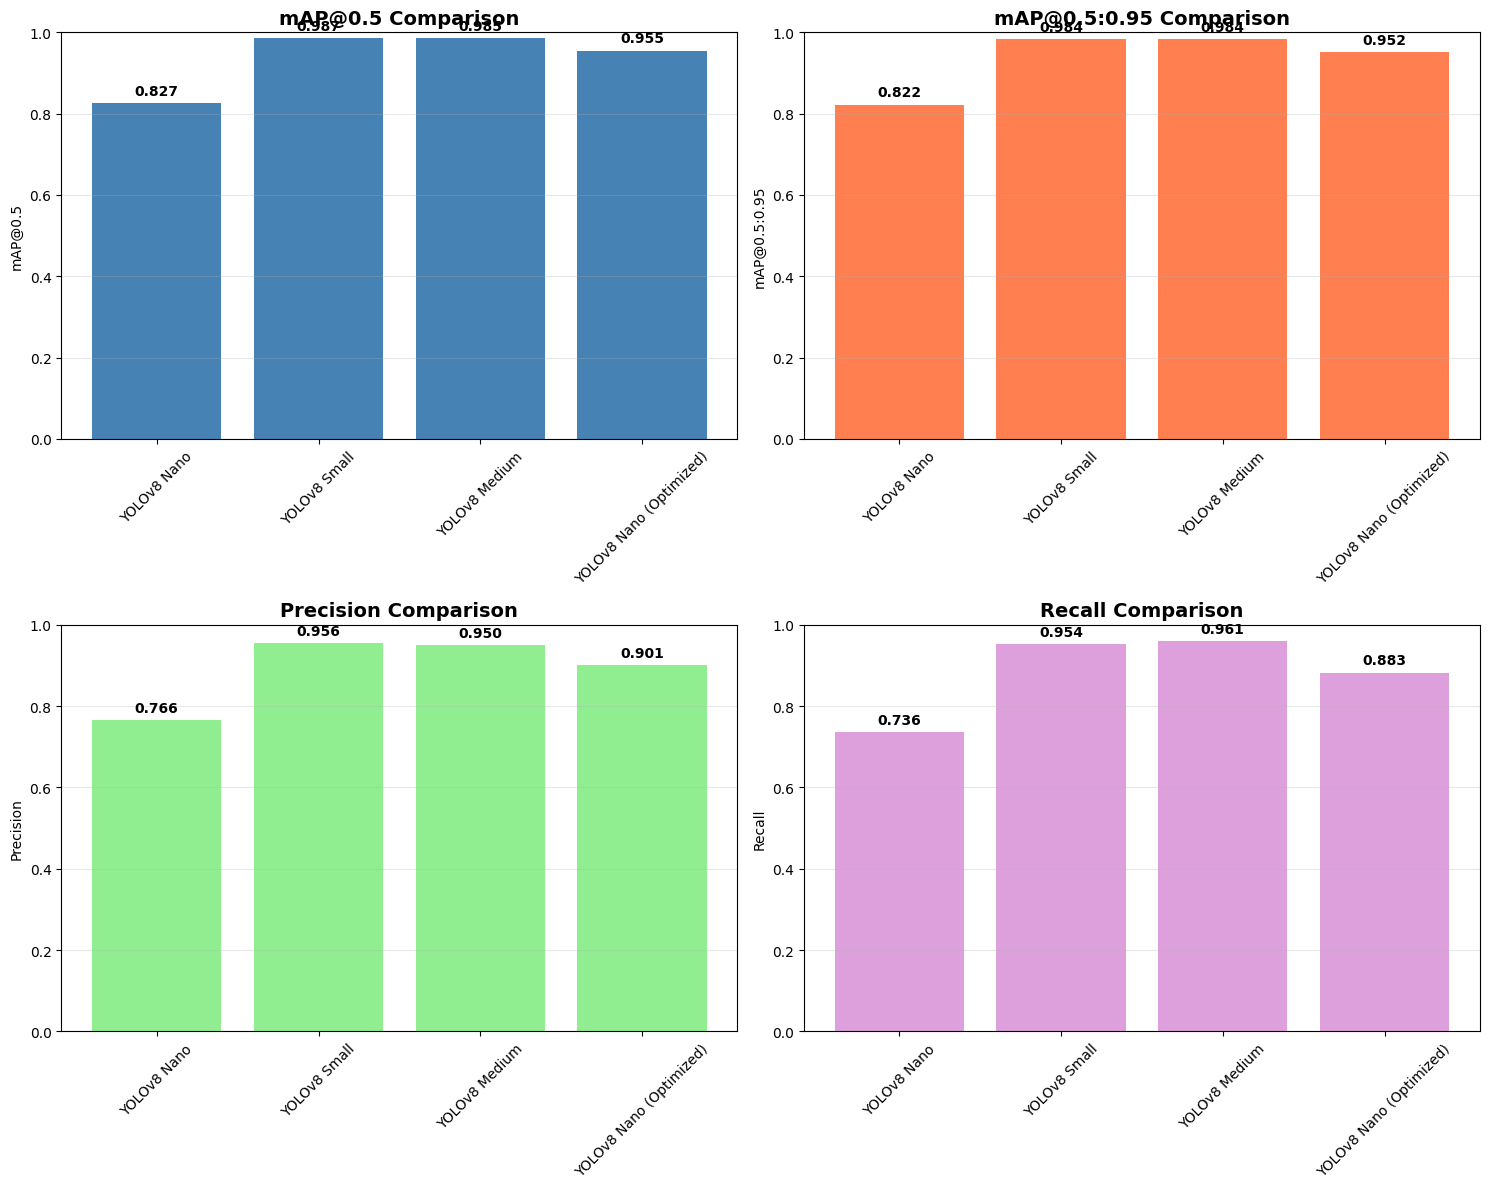

✅ Comparison plot saved to: /content/model_results/model_comparison.png


In [ ]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: mAP@0.5
axes[0, 0].bar(df_results['model_name'], df_results['mAP50'], color='steelblue')
axes[0, 0].set_title('mAP@0.5 Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('mAP@0.5')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(df_results['mAP50']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 2: mAP@0.5:0.95
axes[0, 1].bar(df_results['model_name'], df_results['mAP50-95'], color='coral')
axes[0, 1].set_title('mAP@0.5:0.95 Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('mAP@0.5:0.95')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(df_results['mAP50-95']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 3: Precision
axes[1, 0].bar(df_results['model_name'], df_results['precision'], color='lightgreen')
axes[1, 0].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(df_results['precision']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 4: Recall
axes[1, 1].bar(df_results['model_name'], df_results['recall'], color='plum')
axes[1, 1].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_ylim([0, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(df_results['recall']):
    axes[1, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Comparison plot saved to: {RESULTS_DIR}/model_comparison.png")

---
## Step 7: Identify Best Model

In [ ]:
# Find best model based on mAP@0.5:0.95
best_model_idx = df_results['mAP50-95'].idxmax()
best_model = df_results.loc[best_model_idx]

print("\n" + "="*80)
print("🏆 BEST MODEL IDENTIFIED")
print("="*80)
print(f"\nModel: {best_model['model_name']}")
print(f"\nPerformance Metrics:")
print(f"  • mAP@0.5: {best_model['mAP50']:.3f}")
print(f"  • mAP@0.5:0.95: {best_model['mAP50-95']:.3f}")
print(f"  • Precision: {best_model['precision']:.3f}")
print(f"  • Recall: {best_model['recall']:.3f}")
print(f"  • Model Path: {best_model['model_path']}")
print("\n" + "="*80)

# Save best model info
with open(f"{RESULTS_DIR}/best_model.txt", 'w') as f:
    f.write(f"Best Model: {best_model['model_name']}\n")
    f.write(f"mAP@0.5: {best_model['mAP50']:.3f}\n")
    f.write(f"mAP@0.5:0.95: {best_model['mAP50-95']:.3f}\n")
    f.write(f"Precision: {best_model['precision']:.3f}\n")
    f.write(f"Recall: {best_model['recall']:.3f}\n")
    f.write(f"Model Path: {best_model['model_path']}\n")


🏆 BEST MODEL IDENTIFIED

Model: YOLOv8 Small

Performance Metrics:
  • mAP@0.5: 0.987
  • mAP@0.5:0.95: 0.984
  • Precision: 0.956
  • Recall: 0.954
  • Model Path: runs/detect/yolov8s_detection/weights/best.pt



---
## Step 8: Test Best Model on Sample Images


🎯 Testing YOLOv8 Small on 5 sample images...


image 1/1 /content/drive/MyDrive/Output_Folder_YoLo/images/val/val_0000.jpg: 640x640 1 OBJ786, 1 OBJ787, 1 OBJ003, 1 OBJ008, 1 OBJ012, 1 OBJ018, 1 OBJ019, 1 OBJ107, 1 OBJ108, 1 OBJ208, 1 OBJ222, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Image 1: val_0000.jpg
  • Detected: Class 20, Confidence: 1.00
  • Detected: Class 33, Confidence: 1.00
  • Detected: Class 7, Confidence: 1.00
  • Detected: Class 19, Confidence: 0.99
  • Detected: Class 0, Confidence: 0.99
  • Detected: Class 28, Confidence: 0.99
  • Detected: Class 14, Confidence: 0.98
  • Detected: Class 29, Confidence: 0.98
  • Detected: Class 10, Confidence: 0.95
  • Detected: Class 32, Confidence: 0.85
  • Detected: Class 17, Confidence: 0.81


image 1/1 /content/drive/MyDrive/Output_Folder_YoLo/images/val/val_0001.jpg: 640x640 1 OBJ069, 1 OBJ090, 2 OBJ008s, 1 OBJ018, 1 OBJ031, 1 OBJ107, 1 OBJ111, 7.4ms
Speed: 1.5ms preproc

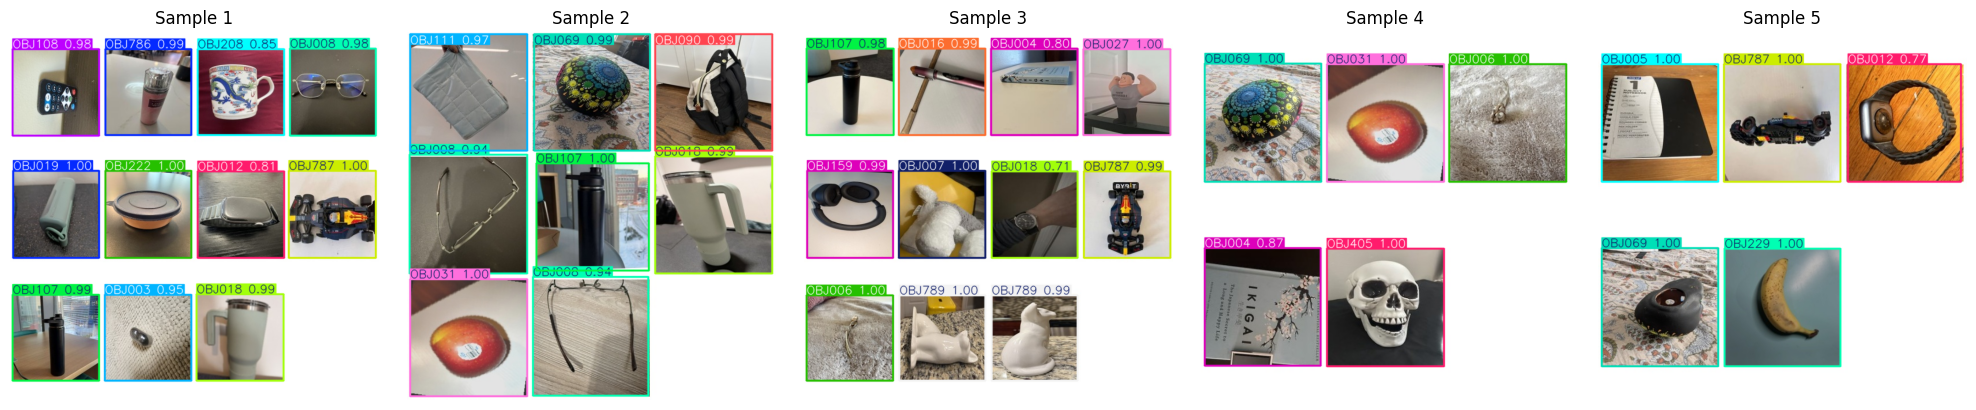

✅ Sample predictions saved to: /content/model_results/sample_predictions.png


In [ ]:
# Load best model
best_model_path = best_model['model_path']
model = YOLO(best_model_path)

# Get sample validation images
val_images = list(Path(f"{DATASET_PATH}/images/val").glob("*.jpg"))[:5]

print(f"\n🎯 Testing {best_model['model_name']} on {len(val_images)} sample images...\n")

fig, axes = plt.subplots(1, len(val_images), figsize=(20, 4))
if len(val_images) == 1:
    axes = [axes]

for idx, img_path in enumerate(val_images):
    # Run prediction
    results = model.predict(source=str(img_path), conf=0.25, save=False)

    # Get annotated image
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Display
    axes[idx].imshow(annotated_img)
    axes[idx].set_title(f"Sample {idx+1}", fontsize=12)
    axes[idx].axis('off')

    # Print detections
    print(f"Image {idx+1}: {img_path.name}")
    for box in results[0].boxes:
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])
        print(f"  • Detected: Class {class_id}, Confidence: {confidence:.2f}")
    print()

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/sample_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Sample predictions saved to: {RESULTS_DIR}/sample_predictions.png")

In [ ]:
# Define class_names from the data.yaml file
import yaml

yaml_path = f"{DATASET_PATH}/data.yaml"

with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

class_names = data_config['names']
num_classes = data_config['nc']

print(f"✅ Loaded {num_classes} class names:")
print(f"   {class_names}")

✅ Loaded 39 class names:
   ['OBJ786', 'OBJ788', 'OBJ789', 'OBJ069', 'OBJ007', 'OBJ027', 'OBJ090', 'OBJ787', 'OBJ001', 'OBJ002', 'OBJ003', 'OBJ004', 'OBJ005', 'OBJ006', 'OBJ008', 'OBJ009', 'OBJ010', 'OBJ012', 'OBJ016', 'OBJ018', 'OBJ019', 'OBJ021', 'OBJ022', 'OBJ028', 'OBJ029', 'OBJ031', 'OBJ061', 'OBJ095', 'OBJ107', 'OBJ108', 'OBJ111', 'OBJ159', 'OBJ208', 'OBJ222', 'OBJ229', 'OBJ230', 'OBJ311', 'OBJ405', 'images_OBJ_300']


🎲 Testing on 2 random images from 20 total


🎲 Random Image 1: val_0017.jpg
   ✅ Detected 13 object(s):

      Object 1: OBJ029 (99.69%)
      Object 2: OBJ005 (99.29%)
      Object 3: OBJ229 (99.22%)
      Object 4: OBJ789 (99.21%)
      Object 5: OBJ405 (98.83%)
      Object 6: OBJ107 (98.21%)
      Object 7: OBJ069 (97.51%)
      Object 8: OBJ005 (97.08%)
      Object 9: OBJ005 (96.87%)
      Object 10: OBJ003 (96.74%)
      Object 11: OBJ095 (94.17%)
      Object 12: OBJ788 (93.91%)
      Object 13: OBJ095 (70.79%)


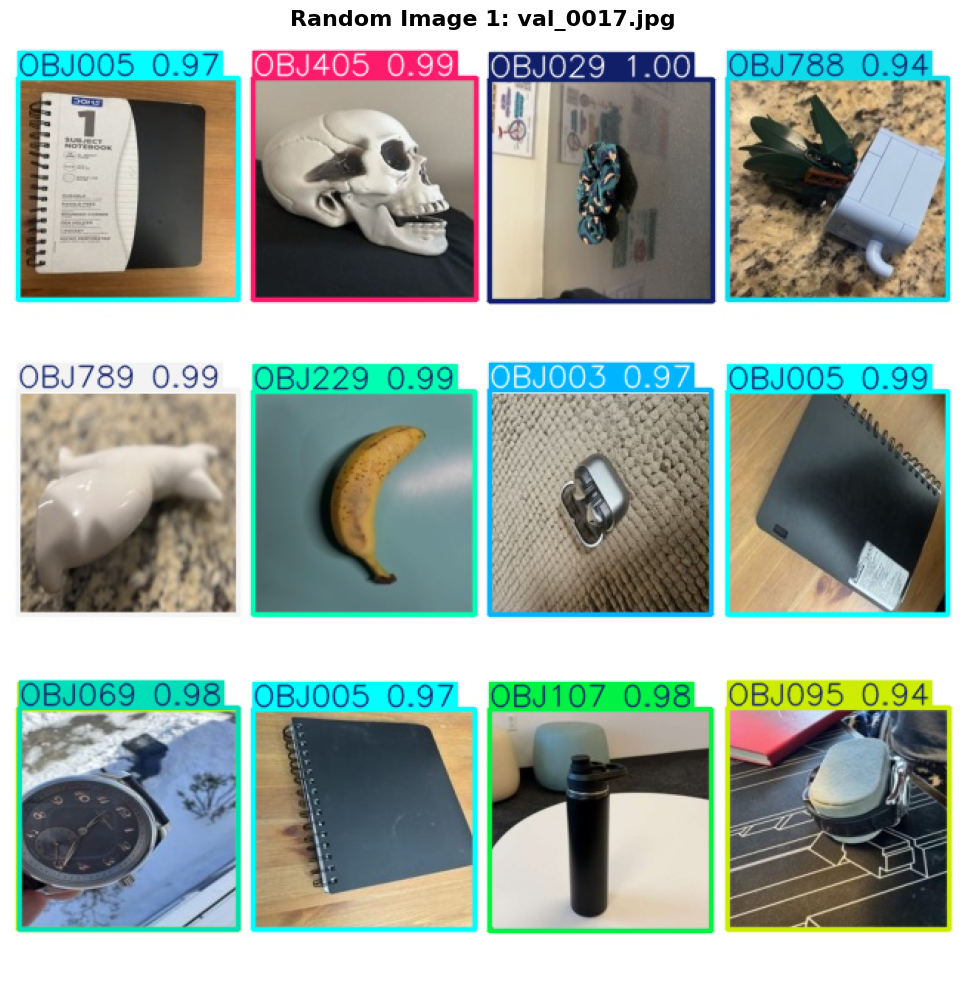


🎲 Random Image 2: val_0003.jpg
   ✅ Detected 5 object(s):

      Object 1: OBJ005 (99.97%)
      Object 2: OBJ787 (99.72%)
      Object 3: OBJ069 (99.62%)
      Object 4: OBJ229 (99.56%)
      Object 5: OBJ012 (77.43%)


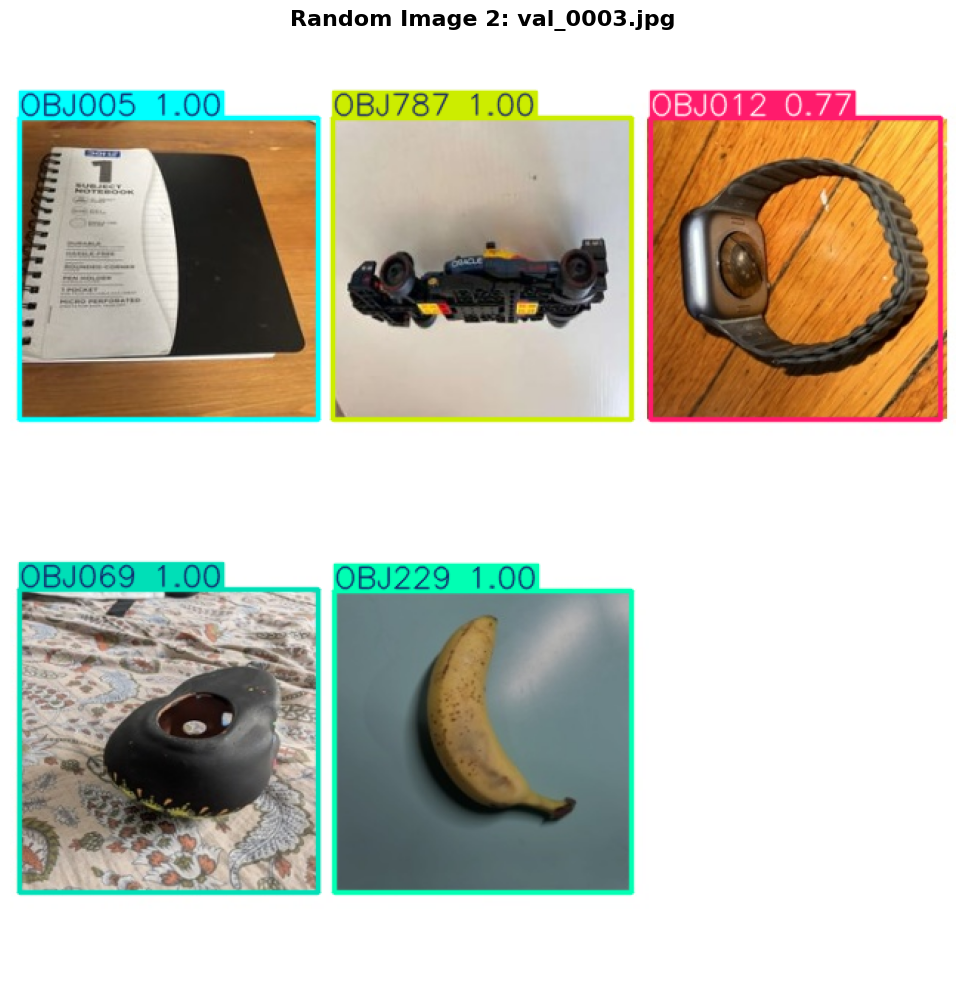


✅ All predictions complete!


In [ ]:
# ================================
# TEST ON 2 RANDOM IMAGES
# ================================

import yaml
import random

# Load class names
yaml_path = "/content/drive/MyDrive/Output_Folder_YoLo/data.yaml"
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)
class_names = data_config['names']

# Load model
model = YOLO(best_model['model_path'])

# Get images
val_image_dir = Path("/content/drive/MyDrive/Output_Folder_YoLo/images/val")
all_images = list(val_image_dir.glob("*.jpg")) + list(val_image_dir.glob("*.png"))

# Pick 2 random images
num_test = 2
random_images = random.sample(all_images, min(num_test, len(all_images)))

print(f"🎲 Testing on {len(random_images)} random images from {len(all_images)} total\n")

for idx, selected_image in enumerate(random_images, 1):
    print(f"\n{'='*60}")
    print(f"🎲 Random Image {idx}: {selected_image.name}")
    print("="*60)

    # Predict
    results = model.predict(source=str(selected_image), conf=0.25, save=False, verbose=False)
    boxes = results[0].boxes

    if len(boxes) == 0:
        print("   ⚠️ No objects detected!")
    else:
        print(f"   ✅ Detected {len(boxes)} object(s):\n")

        for i, box in enumerate(boxes, 1):
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])
            class_name = class_names[class_id]

            print(f"      Object {i}: {class_name} ({confidence:.2%})")

    # Show image
    annotated_img = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(annotated_img)
    plt.title(f"Random Image {idx}: {selected_image.name}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\n✅ All predictions complete!")